# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [6]:
pd.options.mode.chained_assignment = None

In [7]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

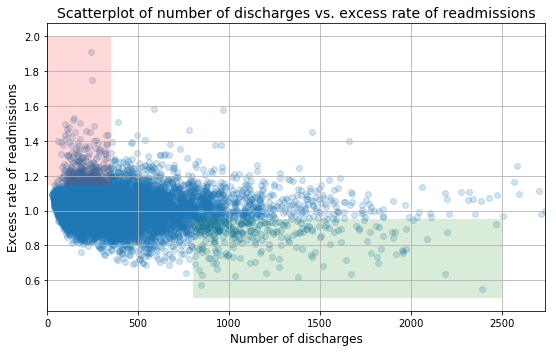

In [13]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [40]:
# Your turn
from scipy.stats import pearsonr

### Do you agree with the above analysis and recommendations? Why or why not?

I do not agree with the above analysis and recommendations because it has no statistical analysis backing up the conclusions and the conclusions are just based on plot and simple statistical calculation. Firstly, the plot might show some relationship between number of discharges and excess rate of readmissions but the relationship seems to be very weak. Statistical calculation and test should be performed to examine the relationship. Secondly, the statistics on the mean excess readmission rate and the percentage of rate greater than 1 suggests that in this data set there is a difference between small and big hospitals/facilities, but it could be due to sampling errors and statistical tests should be done to back up the conclusion. 

### Set up appropriate hypothesis test: 
Null Hypothesis: There is no relationship between number of discharges and excess rate of readmissions. 

Alternative Hypothesis: There is relationship between number of discharges and excess rate of readmissions.

### Compute and report the observed significance value (or p-value): 

In [59]:
corr, p = pearsonr(x, y)
print('Pearson Correlation coefficient between number of discharges and excess rate of readmissions is: %.3f' % corr)
print('The two-tailed P value is: {}'.format(p))

Pearson Correlation coefficient between number of discharges and excess rate of readmissions is: -0.093
The two-tailed P value is: 1.5022756426464526e-23


### Report statistical significance for $\alpha$  = .01: 
The p value in this case is much lower than 0.01, so the result should be statistically significant at $\alpha$ < 0.01.

### Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

The statistical significance examines if the observed difference/relationship from the sample data is due to sampling error or not. As the sample size gets large enough, it would usually acheive statistical significance. The pratical significance examines whether the observed difference/relationship is large enough to be considered valuable in practical sense. In this case, statistical significance and practical significance differ since the p value is small enough to suggest statistical significance but the correlation coefficient is very close to zero that it does not suggest practical significance. According to above, I would not recommend that Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.

### What are the advantages and disadvantages of using above plot to convey information? Construct another plot that conveys the same information in a more direct manner.
The advantages of using above plot are that it shows the pattern of comsidering hospitals' excess rate of readmission and number of discharges together and it blocks some area of points that it thinks people should take notice. The disadvantage is that it does not show directly what relationship the pattern is suggesting. The below plot adds a least squares fit line to directly show that there is a very weak negative relationship between excess rate of readmission and number of discharges.

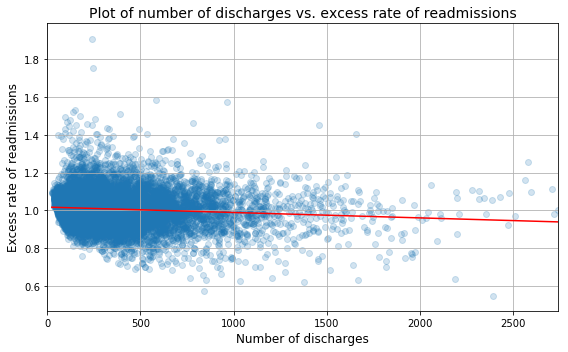

In [57]:
slope, intercept = np.polyfit(x, y, deg=1)
y_fit = [slope*a+intercept for a in x]

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)
ax.plot(x, y_fit, 'r')

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Plot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()